In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Generate the TE values/ time
TE = np.arange(1,512,4).T
#Generate the T2 values
T2 = np.arange(1,201).T
#Generate G_matrix
G = np.exp(-TE[:, np.newaxis] / T2)

nTE = len(TE)
nT2 = len(T2)
sigma1 = 2
mu1 = 40
sigma2 = 6
mu2 = 100

#Create ground truth
g = (1 / (np.sqrt(2 * np.pi) * sigma1)) * np.exp(-((T2 - mu1) ** 2) / (2 * sigma1 ** 2))
g = g + (1 / (np.sqrt(2 * np.pi) * sigma2)) * np.exp(-((T2 - mu2) ** 2) / (2 * sigma2 ** 2))
g = g/2

#SNR values
SNR = 30

#Generate noiseless data curve and noisy data curve
data_noiseless = G @ g
noise = np.column_stack([np.max(np.abs(data_noiseless)) / SNR * np.random.randn(len(TE), 1)]) 
noise  = np.ravel(noise)
data_noisy = data_noiseless + np.ravel(noise)


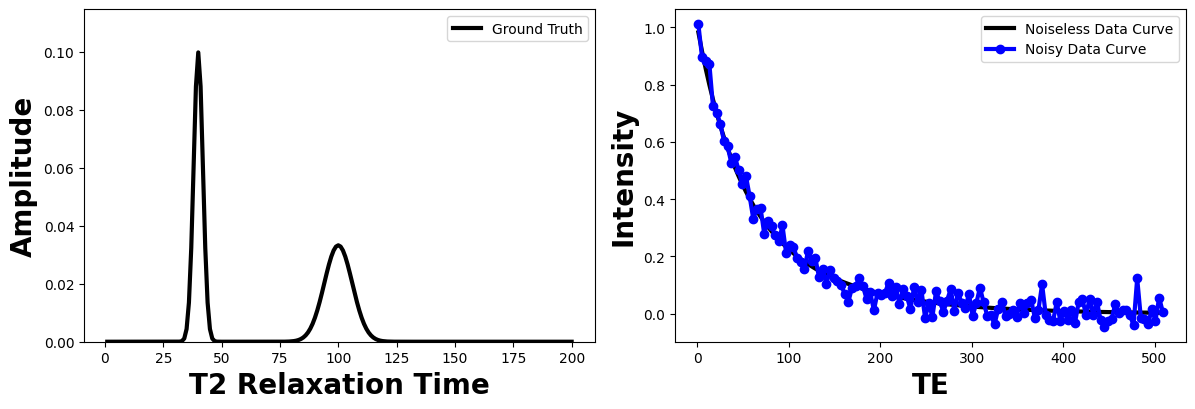

In [12]:
# Plot 
plt.figure(figsize=(12.06, 4.2))
# Plotting the first subplot
plt.subplot(1, 2, 1) 
plt.plot(T2, g, linewidth=3, color='black', label='Ground Truth')
plt.legend(fontsize=10, loc='best')
plt.xlabel('T2 Relaxation Time', fontsize=20, fontweight='bold')
plt.ylabel('Amplitude', fontsize=20, fontweight='bold')
ymax = np.max(g) * 1.15
plt.ylim(0, ymax)

# Plotting the second subplot
plt.subplot(1, 2, 2)
plt.plot(TE, data_noiseless, linewidth=3, color='black', label='Noiseless Data Curve')
plt.plot(TE, data_noisy, linewidth=3, color='blue',marker='o', label='Noisy Data Curve')
plt.legend(fontsize=10, loc='best')
plt.xlabel('TE', fontsize=20, fontweight='bold')
plt.ylabel('Intensity', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show() 